# T-Maze Demo


## Notes

### Structure of state to outcome mapping

Location - Identical to the Location hidden state
Rewards - No rewards (index 0) when the agent is in the central or cue location
Cue - 


## Imports

In [2]:
import os
import sys
import pathlib
import numpy as np
import copy

from pymdp.agent import Agent
from pymdp.utils import plot_beliefs, plot_likelihood
from pymdp import utils
from pymdp.envs import TMazeEnv

## Environment

In [36]:
a = 0.80

env = TMazeEnv( reward_probs=[a, 1 - a] )

In [74]:
A_gp = env.get_likelihood_dist()
B_gp = env.get_transition_dist()

In [77]:
# The following is done as a distinction between the generative process (gp) and the generative model (gm) in this case we have set them as identical
# Strictly speaking the process can be arbitrary complex as long as it produces information that can be cosumed by a MDP agent as we have
A_gm = copy.deepcopy(A_gp)
B_gm = copy.deepcopy(B_gp)

controllable_indices = [0]

agent = Agent(A=A_gm, B=B_gm, control_fac_idx=controllable_indices)

In [86]:
# Giving the agent the exact belif of their starting location
agent.D[0] = utils.onehot(0, agent.num_states[0])

# Encoding preferences of reward vs loss in the reward outcome modality
agent.C[1][1] = 3.0
agent.C[1][2] = -3.0

## Active Inference

In [88]:
T = 1 # number of timesteps

obs = env.reset() # reset the environment and get an initial observation

# these are useful for displaying read-outs during the loop over time
reward_conditions = ["Right", "Left"]
location_observations = ['CENTER','RIGHT ARM','LEFT ARM','CUE LOCATION']
reward_observations = ['No reward','Reward!','Loss!']
cue_observations = ['Cue Right','Cue Left']
msg = """ === Starting experiment === \n Reward condition: {}, Observation: [{}, {}, {}]"""
print(msg.format(reward_conditions[env.reward_condition], location_observations[obs[0]], reward_observations[obs[1]], cue_observations[obs[2]]))

for t in range(T):

    qx = agent.infer_states(obs)

    q_pi, efe = agent.infer_policies()

    action = agent.sample_action()

    msg = """[Step {}] Action: [Move to {}]"""
    print(msg.format(t, location_observations[int(action[0])]))

    obs = env.step(action)

    msg = """[Step {}] Observation: [{},  {}, {}]"""
    print(msg.format(t, location_observations[obs[0]], reward_observations[obs[1]], cue_observations[obs[2]]))

 === Starting experiment === 
 Reward condition: Left, Observation: [CENTER, No reward, Cue Left]
[Step 0] Action: [Move to RIGHT ARM]
[Step 0] Observation: [RIGHT ARM,  Loss!, Cue Left]


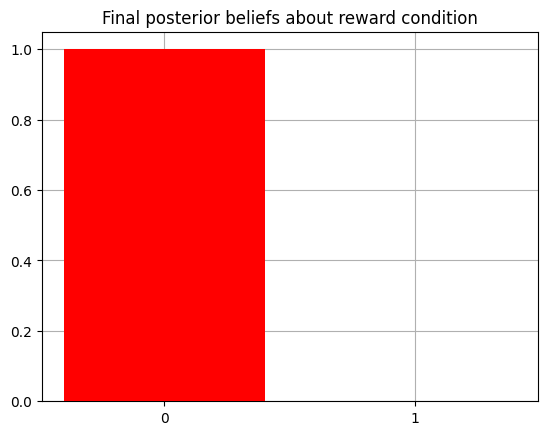

In [85]:
plot_beliefs(qx[1],"Final posterior beliefs about reward condition")